# Can Drug Make you Happy?

## date source: 

guardian.co.uk：http://www.guardian.co.uk/news/datablog/2009/jun/24/drugs-trade-drugs 

World Database of Happiness：http://worlddatabaseofhappiness.eur.nl/


In [233]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
country = gpd.read_file('country.json')
country.head()

,abbrev,abbrev_len,adm0_a3,adm0_a3_is,adm0_a3_un,adm0_a3_us,adm0_a3_wb,adm0_dif,admin,brk_a3,...,su_dif,subregion,subunit,tiny,type,un_a3,wb_a2,wb_a3,wikipedia,woe_id
0,Belize,6,BLZ,BLZ,-99,BLZ,-99,0,Belize,BLZ,...,0,Central America,Belize,-99,Sovereign country,084,BZ,BLZ,-99,-99
1,Bhs.,4,BHS,BHS,-99,BHS,-99,0,The Bahamas,BHS,...,0,Caribbean,The Bahamas,-99,Sovereign country,044,BS,BHS,-99,-99
2,Can.,4,CAN,CAN,-99,CAN,-99,0,Canada,CAN,...,0,Northern America,Canada,-99,Sovereign country,124,CA,CAN,-99,-99
3,Cuba,4,CUB,CUB,-99,CUB,-99,0,Cuba,CUB,...,0,Caribbean,Cuba,-99,Sovereign country,192,CU,CUB,-99,-99
4,C.R.,4,CRI,CRI,-99,CRI,-99,0,Costa Rica,CRI,...,0,Central America,Costa Rica,-99,Sovereign country,188,CR,CRI,-99,-99


In [235]:
country = country[['admin', 'geometry']]
country.head()

,admin,geometry
0,Belize,POLYGON ((-89.14308041050332 17.80831899664932...
1,The Bahamas,"(POLYGON ((-77.53466 23.75975, -77.78 23.71, -..."
2,Canada,"(POLYGON ((-63.6645 46.55001, -62.9393 46.4158..."
3,Cuba,"POLYGON ((-82.26815121125706 23.1886107447177,..."
4,Costa Rica,POLYGON ((-82.96578304719736 8.225027980985985...


In [236]:
country = country[['admin', 'geometry']]

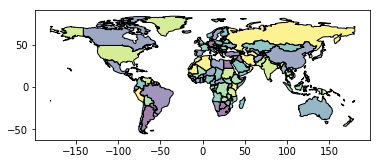

In [237]:
country.plot()

In [238]:
table = pd.read_csv('drug&happiness.csv')
table.head()

,COUNTRY (lowest estimate or overall estimate used),"Cocaine, % of pop adults","Cannabis, % of pop, adults","Amphetamines, % of pop, adults","Opiates, % of pop, adults",happiness rating (2006),total drug use,alcohol use per capita,Unnamed: 8,Unnamed: 9
0,Afghanistan,NaN,3.6,NaN,NaN,4.7,3.60,NaN,NaN,NaN
1,Albania,0.1,1.8,0.1,0.45,4.6,2.45,2.51,NaN,NaN
2,Algeria,NaN,5.2,NaN,0.12,5.2,5.32,0.03,NaN,NaN
3,Angola,0.1,2.1,NaN,0.25,4.0,2.45,2.91,NaN,NaN
4,Antigua & Barbuda,0.1,NaN,NaN,0.05,NaN,0.15,4.24,NaN,NaN


In [239]:
table['COUNTRY (lowest estimate or overall estimate used)'].replace('USA', 'United States of America', inplace=True)
table['COUNTRY (lowest estimate or overall estimate used)'].replace('UAE', 'United Arab Emirates', inplace=True)

In [240]:
new = table.merge(country, left_on='COUNTRY (lowest estimate or overall estimate used)', right_on='admin')
new_geo = gpd.GeoDataFrame(new)
new_geo.head()

,COUNTRY (lowest estimate or overall estimate used),"Cocaine, % of pop adults","Cannabis, % of pop, adults","Amphetamines, % of pop, adults","Opiates, % of pop, adults",happiness rating (2006),total drug use,alcohol use per capita,Unnamed: 8,Unnamed: 9,admin,geometry
0,Afghanistan,NaN,3.6,NaN,NaN,4.7,3.60,NaN,NaN,NaN,Afghanistan,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,Albania,0.1,1.8,0.1,0.45,4.6,2.45,2.51,NaN,NaN,Albania,"POLYGON ((20.59024743010491 41.85540416113361,..."
2,Algeria,NaN,5.2,NaN,0.12,5.2,5.32,0.03,NaN,NaN,Algeria,"POLYGON ((11.99950564947161 23.47166840259645,..."
3,Angola,0.1,2.1,NaN,0.25,4.0,2.45,2.91,NaN,NaN,Angola,(POLYGON ((16.32652835456705 -5.87747039146621...
4,Argentina,2.6,7.2,0.6,0.16,7.5,10.56,8.55,NaN,NaN,Argentina,"(POLYGON ((-65.5 -55.2, -66.45 -55.25, -66.959..."


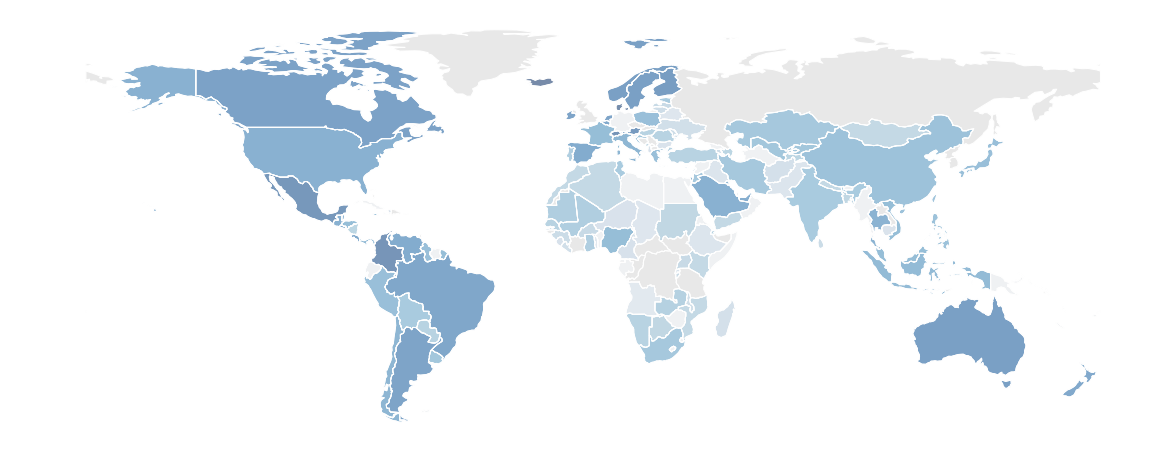

In [241]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
new_geo.plot(column = 'happiness rating (2006)', cmap='Blues', edgecolor='white', ax=ax)
ax.axis('off')

plt.savefig('pics/happiness_graph.pdf')

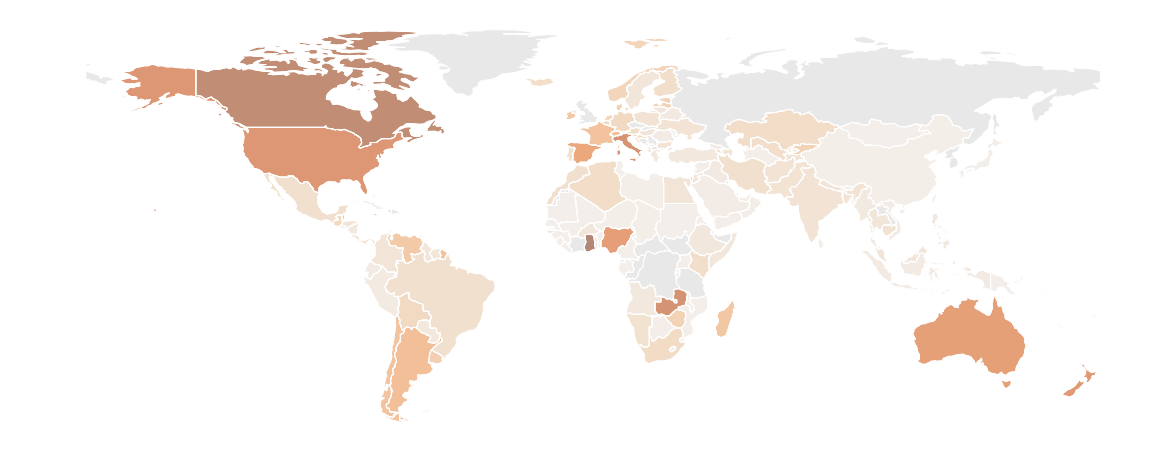

In [242]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
new_geo.plot(column = 'total drug use', cmap='Oranges', edgecolor='white',ax=ax)
ax.axis('off')

plt.savefig('pics/drug_usage_graph.pdf')

In [243]:
new_geo.shape

(147, 12)

In [244]:
new_geo = new_geo[['COUNTRY (lowest estimate or overall estimate used)','happiness rating (2006)','total drug use','geometry']].dropna()
new_geo.shape

(118, 4)

In [245]:
new_geo['happiness rating (2006)'].describe()

count    118.000000
mean       5.963559
std        1.139175
min        3.300000
25%        5.125000
50%        5.900000
75%        6.800000
max        8.500000
Name: happiness rating (2006), dtype: float64

In [246]:
new_geo['total drug use'].describe()

count    118.000000
mean       4.764661
std        4.826071
min        0.000000
25%        1.222500
50%        3.675000
75%        6.752500
max       22.740000
Name: total drug use, dtype: float64

# Calculate larger than median for both happiness and drug usages

In [247]:
happier50 = new_geo[new_geo['happiness rating (2006)'] > 5.900000]
drug_add50 = new_geo[new_geo['total drug use'] > 3.675000]
happier25 = new_geo[new_geo['happiness rating (2006)'] >= 6.800000]
drug_add25 = new_geo[new_geo['total drug use'] >= 6.800000]

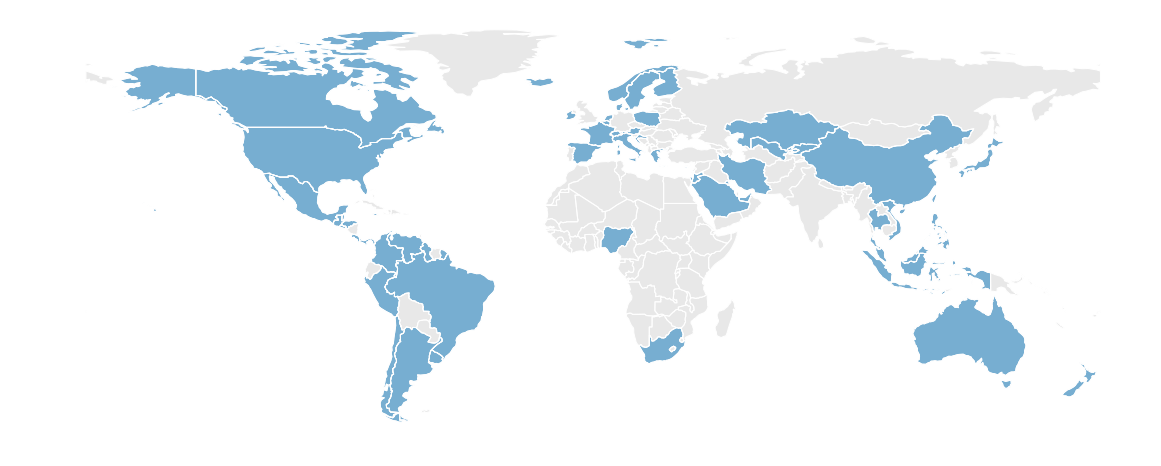

In [248]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
happier50.plot(color='#0775BB', edgecolor='white', ax=ax)
ax.axis('off')

plt.savefig('pics/happiness50%.pdf')

In [249]:
happier50['COUNTRY (lowest estimate or overall estimate used)'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Belize', 'Brazil',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Denmark', 'El Salvador', 'Finland', 'France', 'Greece',
       'Guatemala', 'Guyana', 'Honduras', 'Iceland', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Luxembourg', 'Malaysia',
       'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Saudi Arabia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'United Arab Emirates', 'Uruguay',
       'United States of America', 'Uzbekistan', 'Venezuela', 'Vietnam'], dtype=object)

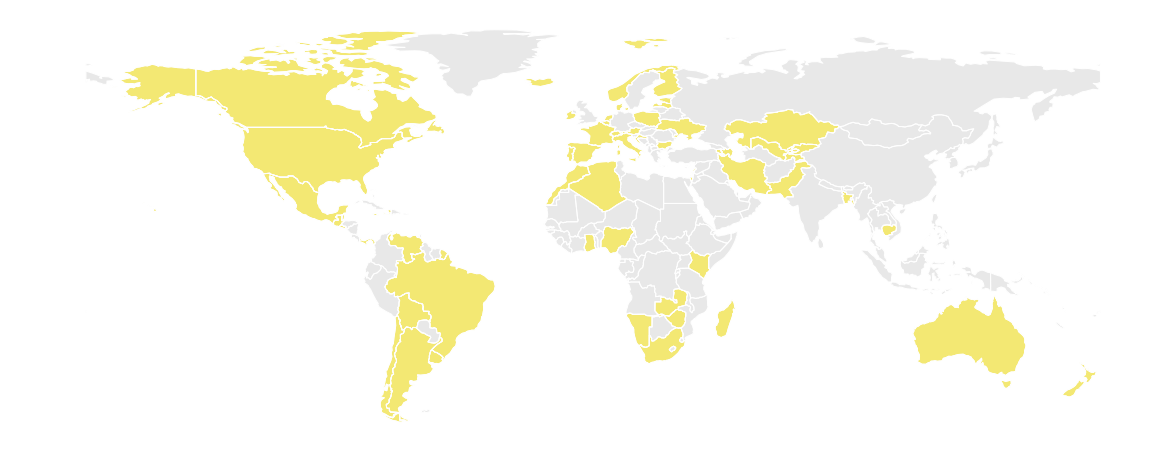

In [250]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
drug_add50.plot(color='#FFE800', edgecolor='white', ax=ax)
ax.axis('off')

plt.savefig('pics/drug50%.pdf')

In [251]:
drug_add50['COUNTRY (lowest estimate or overall estimate used)'].unique()

array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belgium', 'Belize', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Croatia',
       'Denmark', 'El Salvador', 'Estonia', 'Finland', 'France', 'Ghana',
       'Guatemala', 'Haiti', 'Iceland', 'Iran', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Latvia',
       'Lebanon', 'Luxembourg', 'Madagascar', 'Mexico', 'Morocco',
       'Namibia', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Pakistan', 'Panama', 'Poland', 'Portugal', 'South Africa', 'Spain',
       'Switzerland', 'Tajikistan', 'Ukraine', 'Uruguay',
       'United States of America', 'Uzbekistan', 'Venezuela', 'Zambia',
       'Zimbabwe'], dtype=object)

In [252]:
compare50 = happier50.merge(drug_add50, left_on='COUNTRY (lowest estimate or overall estimate used)', right_on='COUNTRY (lowest estimate or overall estimate used)', how='outer')
compare50.shape

(79, 7)

In [253]:
intersect50 = happier50.merge(drug_add50, left_on='COUNTRY (lowest estimate or overall estimate used)', right_on='COUNTRY (lowest estimate or overall estimate used)')
intersect50.shape

(37, 7)

In [254]:
happier50.shape

(57, 4)

In [255]:
drug_add50.shape

(59, 4)

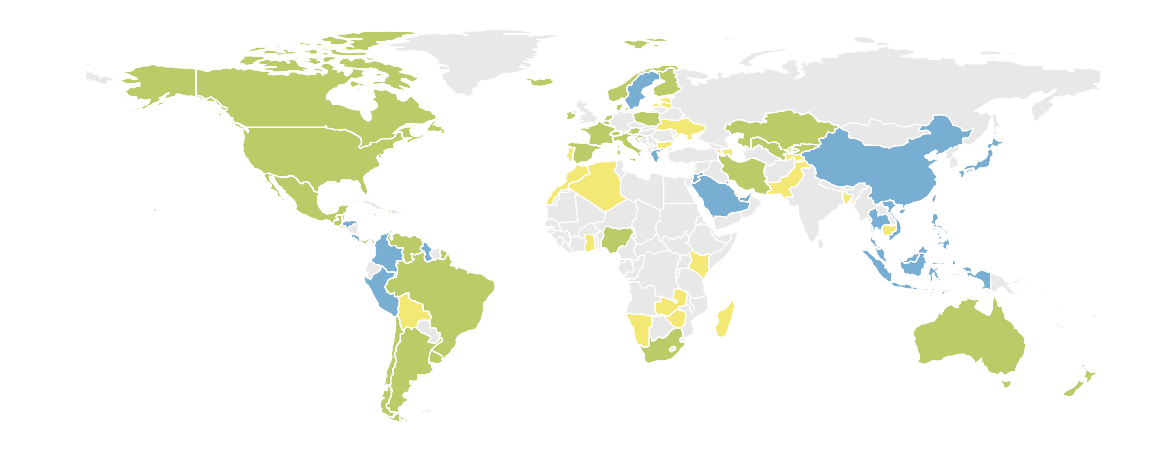

In [256]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
happier50.plot(color='#0775BB', edgecolor='white', ax=ax)
drug_add50.plot(color='#FFE800', edgecolor='white', ax=ax)
ax.axis('off')

plt.savefig('pics/together50%.pdf')

In [257]:
coun_list50 = intersect50['COUNTRY (lowest estimate or overall estimate used)']
coun_list50.unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Belize', 'Brazil',
       'Canada', 'Chile', 'Croatia', 'Denmark', 'El Salvador', 'Finland',
       'France', 'Guatemala', 'Iceland', 'Iran', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Kazakhstan', 'Kyrgyzstan', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Panama', 'Poland', 'South Africa', 'Spain', 'Switzerland',
       'Uruguay', 'United States of America', 'Uzbekistan', 'Venezuela'], dtype=object)

## Correlation for top 50%: 62.7% (37/59 * 100%）

# Calculate for 25%

In [258]:
happier25.shape

(31, 4)

In [259]:
drug_add25.shape

(30, 4)

In [260]:
compare25 = happier25.merge(drug_add25, left_on='COUNTRY (lowest estimate or overall estimate used)', right_on='COUNTRY (lowest estimate or overall estimate used)', how='outer')
compare25.shape

(45, 7)

In [261]:
intersect25 = happier25.merge(drug_add25, left_on='COUNTRY (lowest estimate or overall estimate used)', right_on='COUNTRY (lowest estimate or overall estimate used)')
intersect25.shape

(16, 7)

In [262]:
coun_list25 = inters25['COUNTRY (lowest estimate or overall estimate used)']
coun_list25.unique()

array(['Argentina', 'Australia', 'Belgium', 'Belize', 'Canada', 'Chile',
       'Denmark', 'Ireland', 'Italy', 'Luxembourg', 'New Zealand',
       'Norway', 'Spain', 'Switzerland', 'USA', 'Venezuela'], dtype=object)

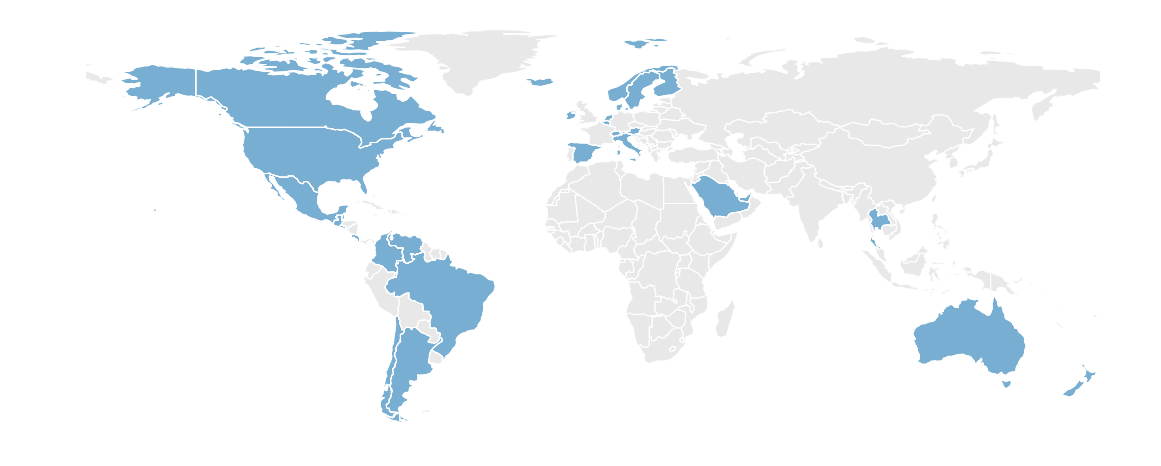

In [263]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
happier25.plot(color='#0775BB', edgecolor='white', ax=ax)
ax.axis('off')


plt.savefig('pics/happiness75%.pdf')

In [264]:
happier25['COUNTRY (lowest estimate or overall estimate used)'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Belize', 'Brazil',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Denmark',
       'El Salvador', 'Finland', 'Guatemala', 'Iceland', 'Ireland',
       'Italy', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Saudi Arabia', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'United Arab Emirates', 'United States of America',
       'Venezuela'], dtype=object)

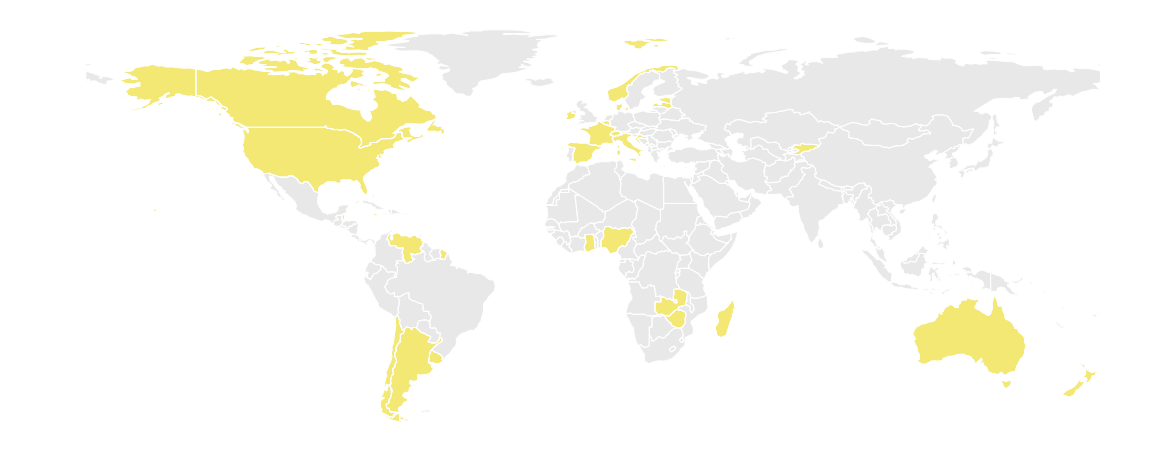

In [265]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
drug_add25.plot(color='#FFE800', edgecolor='white', ax=ax)
ax.axis('off')

plt.savefig('pics/drug75%.pdf')

In [266]:
drug_add25['COUNTRY (lowest estimate or overall estimate used)'].unique()

array(['Argentina', 'Australia', 'Belgium', 'Belize', 'Canada', 'Chile',
       'Croatia', 'Denmark', 'Estonia', 'France', 'Ghana', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Luxembourg', 'Madagascar', 'New Zealand', 'Nigeria', 'Norway',
       'Spain', 'Switzerland', 'Uruguay', 'United States of America',
       'Venezuela', 'Zambia', 'Zimbabwe'], dtype=object)

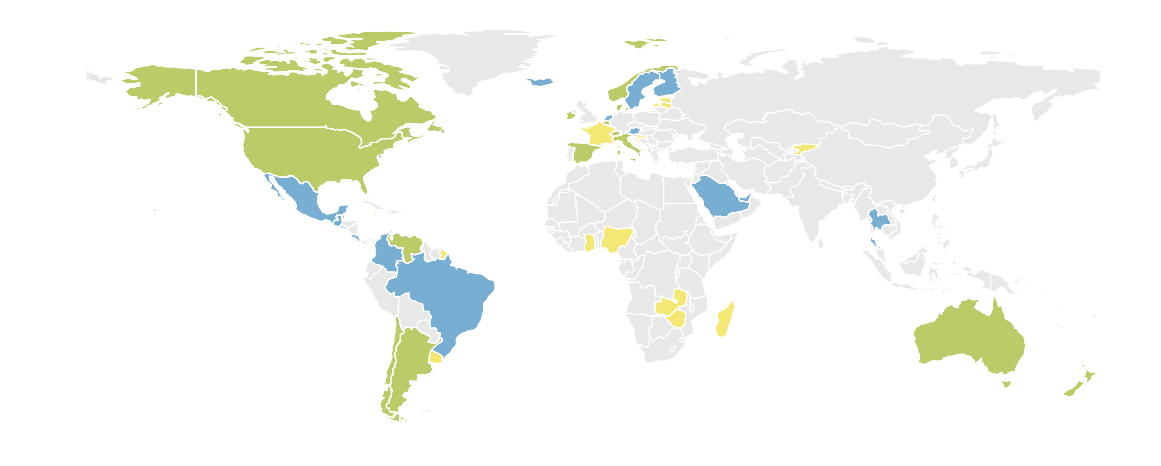

In [267]:
ax = country.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
happier25.plot(color='#0775BB', edgecolor='white', ax=ax)
drug_add25.plot(color='#FFE800', edgecolor='white', ax=ax)
ax.axis('off')

plt.savefig('pics/together75%.pdf')

In [268]:
intersect25['COUNTRY (lowest estimate or overall estimate used)'].unique()

array(['Argentina', 'Australia', 'Belgium', 'Belize', 'Canada', 'Chile',
       'Denmark', 'Ireland', 'Italy', 'Luxembourg', 'New Zealand',
       'Norway', 'Spain', 'Switzerland', 'United States of America',
       'Venezuela'], dtype=object)

## Correlation for top 25%: 53% (16 / 30 * 100%)